In [1]:
!pip install kaggle

In [2]:
!pip install --upgrade librosa

In [3]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

In [4]:
!mkdir kaggle

In [5]:
!mv kaggle.json /content/kaggle

In [6]:
!chmod 600 /content/kaggle/kaggle.json

In [7]:
!kaggle datasets download ejlok1/cremad

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
100% 450M/451M [00:20<00:00, 24.7MB/s]
100% 451M/451M [00:20<00:00, 22.9MB/s]


In [8]:
!kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
100% 428M/429M [00:20<00:00, 24.2MB/s]
100% 429M/429M [00:20<00:00, 22.1MB/s]


In [9]:
!kaggle datasets download ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors
 99% 106M/107M [00:04<00:00, 27.0MB/s]
100% 107M/107M [00:05<00:00, 22.2MB/s]


In [10]:
!kaggle datasets download ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 427M/428M [00:20<00:00, 22.6MB/s]
100% 428M/428M [00:20<00:00, 22.3MB/s]


In [11]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d toronto

Streaming output truncated to the last 5000 lines.
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: toronto/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: toronto/TESS Toronto emotion

In [12]:
!unzip /content/ravdess-emotional-speech-audio.zip -d  ravdess

Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: ravdess/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: ravdess/Actor_01/03-01-03-01-02-02-01.wav  
  inflating: ravdess/Actor_01/03-0

In [13]:
!unzip /content/surrey-audiovisual-expressed-emotion-savee.zip -d surrey

Archive:  /content/surrey-audiovisual-expressed-emotion-savee.zip
  inflating: surrey/ALL/DC_a01.wav   
  inflating: surrey/ALL/DC_a02.wav   
  inflating: surrey/ALL/DC_a03.wav   
  inflating: surrey/ALL/DC_a04.wav   
  inflating: surrey/ALL/DC_a05.wav   
  inflating: surrey/ALL/DC_a06.wav   
  inflating: surrey/ALL/DC_a07.wav   
  inflating: surrey/ALL/DC_a08.wav   
  inflating: surrey/ALL/DC_a09.wav   
  inflating: surrey/ALL/DC_a10.wav   
  inflating: surrey/ALL/DC_a11.wav   
  inflating: surrey/ALL/DC_a12.wav   
  inflating: surrey/ALL/DC_a13.wav   
  inflating: surrey/ALL/DC_a14.wav   
  inflating: surrey/ALL/DC_a15.wav   
  inflating: surrey/ALL/DC_d01.wav   
  inflating: surrey/ALL/DC_d02.wav   
  inflating: surrey/ALL/DC_d03.wav   
  inflating: surrey/ALL/DC_d04.wav   
  inflating: surrey/ALL/DC_d05.wav   
  inflating: surrey/ALL/DC_d06.wav   
  inflating: surrey/ALL/DC_d07.wav   
  inflating: surrey/ALL/DC_d08.wav   
  inflating: surrey/ALL/DC_d09.wav   
  inflating: surrey/AL

In [14]:
!unzip /content/cremad.zip -d crema

Streaming output truncated to the last 5000 lines.
  inflating: crema/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: crema/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: crema/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: crema/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: crema/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: crema/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: crema/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: crema/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: crema/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: crema/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: crema/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: crema/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: crema/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: crema/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: crema/AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: crema/AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: crema/AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: crema/AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: crema/AudioWAV/1031_IEO_SAD_HI.wav  

In [15]:
Ravdess = "/content/ravdess/audio_speech_actors_01-24/"
Crema = "/content/crema/AudioWAV/"
Tess = "/content/toronto/TESS Toronto emotional speech set data/"
Savee = "/content/surrey/ALL/"

In [16]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

<ipython-input-16-a0808166368c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0  disgust  /content/ravdess/audio_speech_actors_01-24/Act...
1      sad  /content/ravdess/audio_speech_actors_01-24/Act...
2      sad  /content/ravdess/audio_speech_actors_01-24/Act...
3    happy  /content/ravdess/audio_speech_actors_01-24/Act...
4  disgust  /content/ravdess/audio_speech_actors_01-24/Act...

In [17]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                         Path
0      sad  /content/crema/AudioWAV/1017_ITH_SAD_XX.wav
1    angry  /content/crema/AudioWAV/1088_DFA_ANG_XX.wav
2    angry  /content/crema/AudioWAV/1040_TSI_ANG_XX.wav
3     fear  /content/crema/AudioWAV/1022_IOM_FEA_XX.wav
4  disgust  /content/crema/AudioWAV/1037_MTI_DIS_XX.wav

In [18]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0  surprise  /content/toronto/TESS Toronto emotional speech...
1  surprise  /content/toronto/TESS Toronto emotional speech...
2  surprise  /content/toronto/TESS Toronto emotional speech...
3  surprise  /content/toronto/TESS Toronto emotional speech...
4  surprise  /content/toronto/TESS Toronto emotional speech...

In [19]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                             Path
0       sad  /content/surrey/ALL/DC_sa14.wav
1   neutral   /content/surrey/ALL/JK_n13.wav
2  surprise  /content/surrey/ALL/KL_su13.wav
3   neutral   /content/surrey/ALL/DC_n22.wav
4   disgust   /content/surrey/ALL/KL_d08.wav

In [20]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  disgust  /content/ravdess/audio_speech_actors_01-24/Act...
1      sad  /content/ravdess/audio_speech_actors_01-24/Act...
2      sad  /content/ravdess/audio_speech_actors_01-24/Act...
3    happy  /content/ravdess/audio_speech_actors_01-24/Act...
4  disgust  /content/ravdess/audio_speech_actors_01-24/Act...

In [21]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [22]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

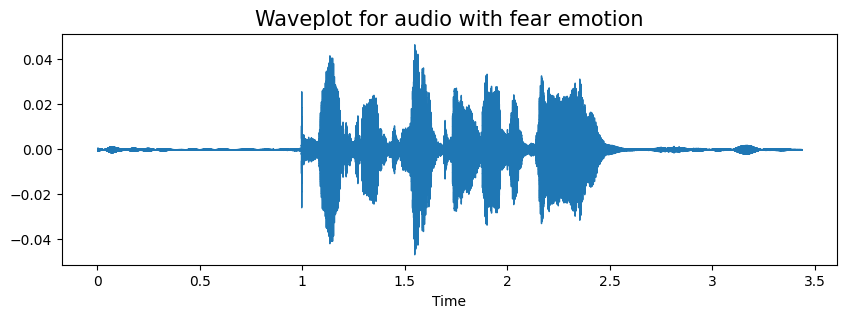

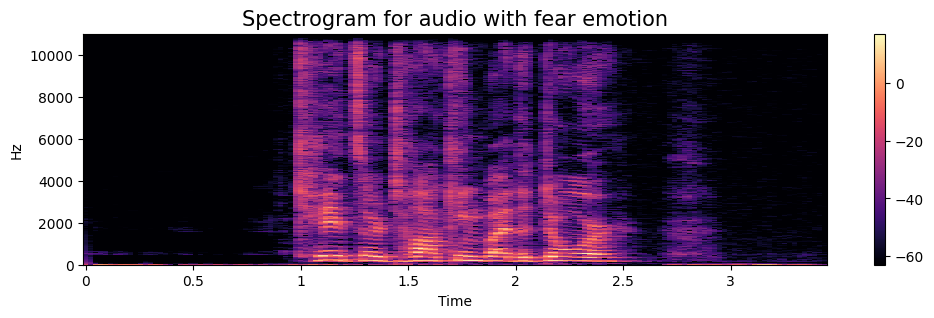

In [23]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

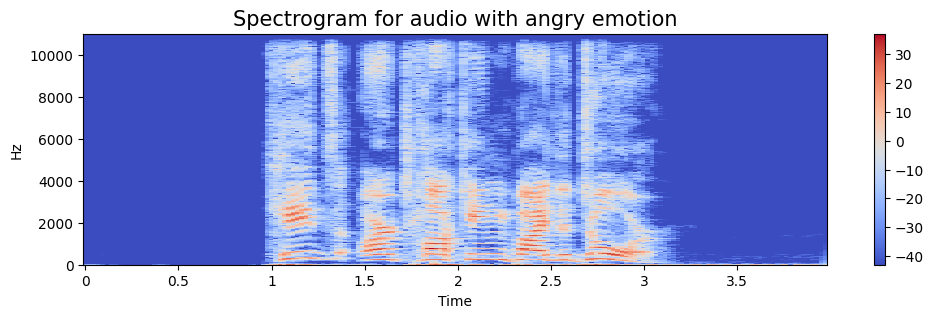

In [24]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

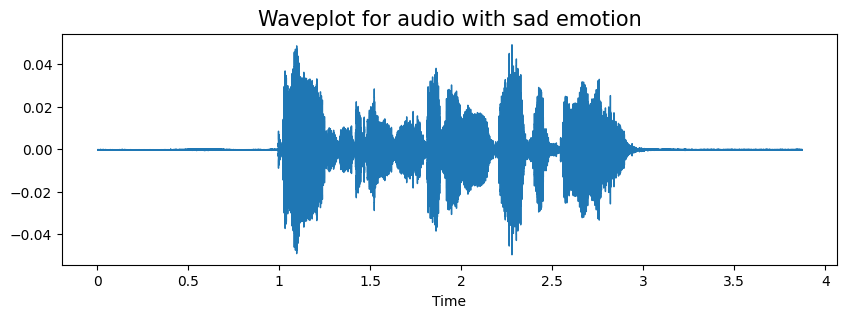

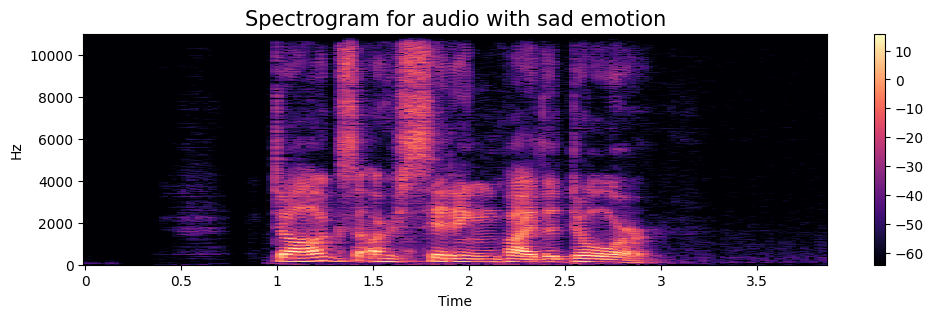

In [25]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

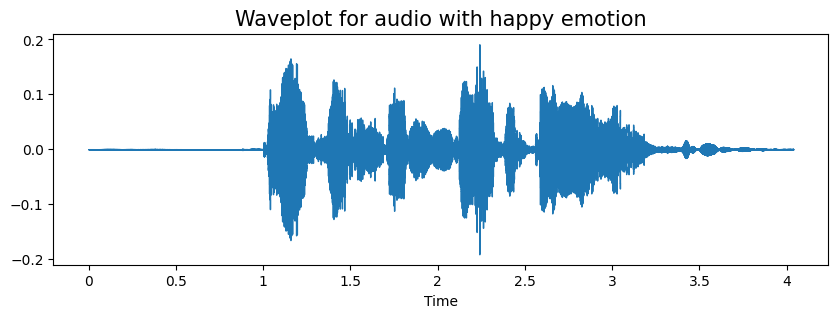

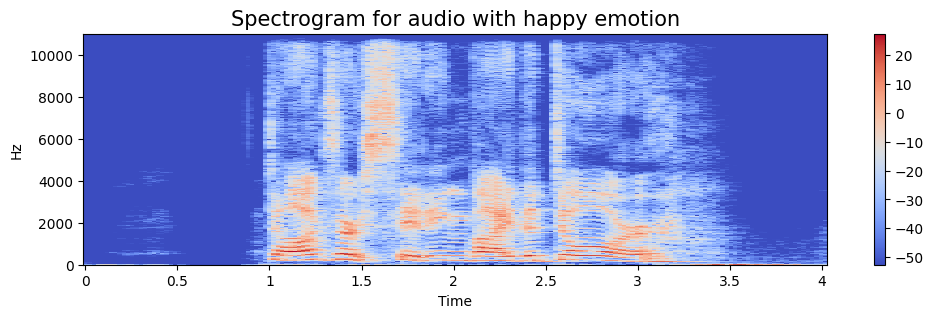

In [26]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [27]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

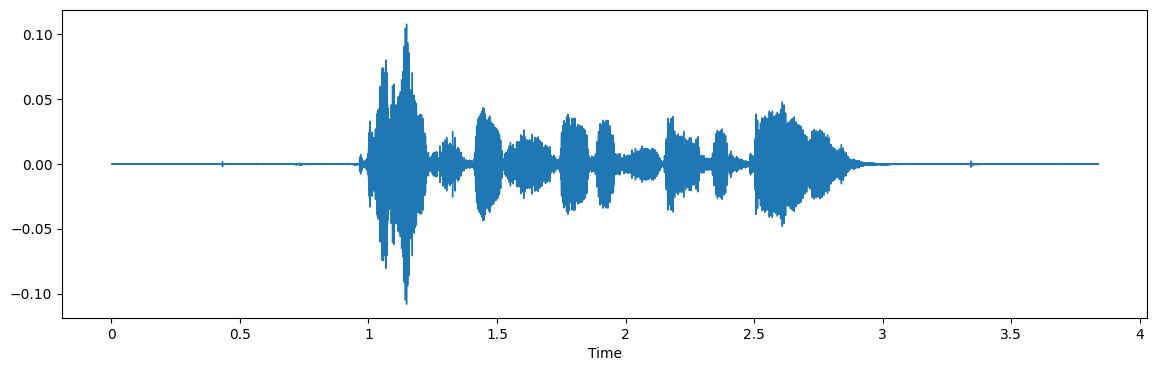

In [28]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

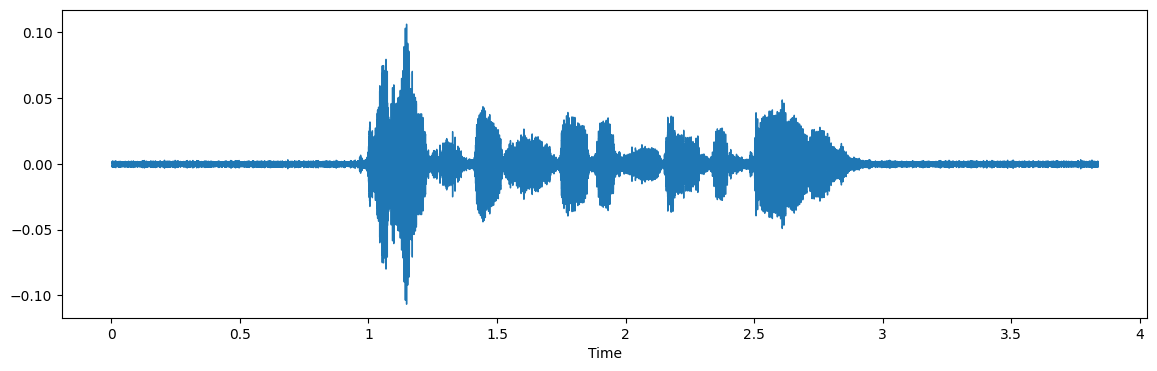

In [29]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [30]:
def stretch(data):
    return librosa.effects.time_stretch(data, rate=0.8)

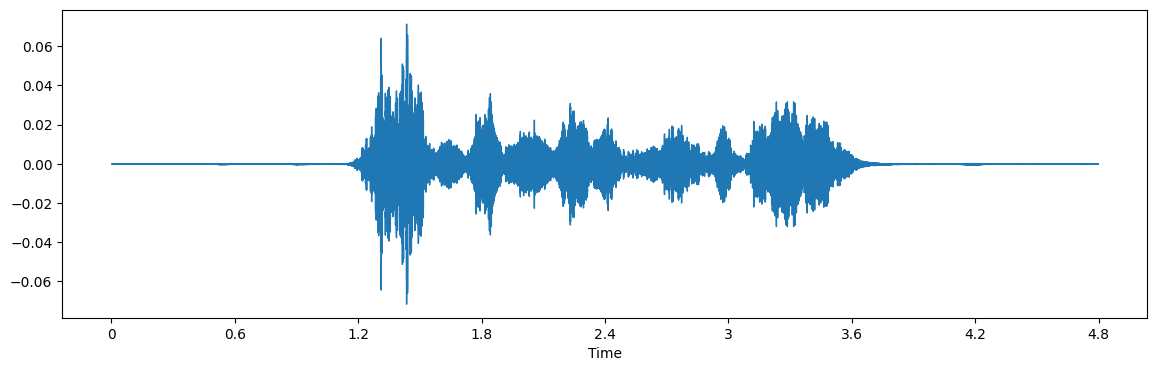

In [31]:
x = stretch(data)  # Apply time stretching to the raw audio signal
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

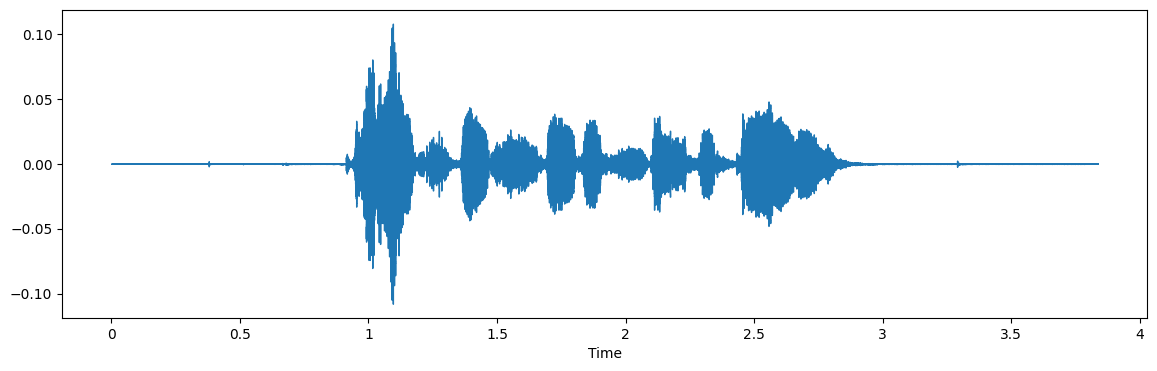

In [32]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [33]:
def pitch(data):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=0.7)

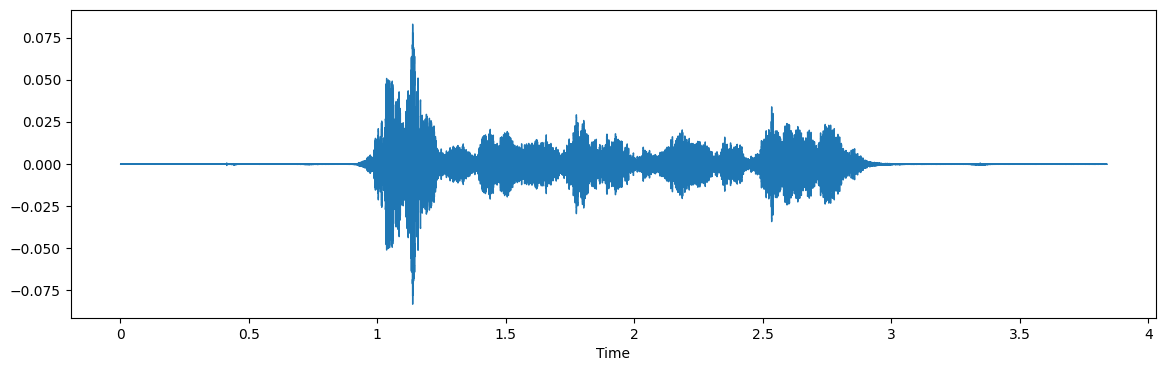

In [34]:
x = pitch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [35]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [36]:
%%time

X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for i, ele in enumerate(feature):
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
        print(f"Done processing feature {i+1} for file: {path} with emotion: {emotion}")

Streaming output truncated to the last 5000 lines.
Done processing feature 2 for file: /content/crema/AudioWAV/1084_IWW_DIS_XX.wav with emotion: disgust
Done processing feature 3 for file: /content/crema/AudioWAV/1084_IWW_DIS_XX.wav with emotion: disgust
Done processing feature 1 for file: /content/crema/AudioWAV/1020_IWW_HAP_XX.wav with emotion: happy
Done processing feature 2 for file: /content/crema/AudioWAV/1020_IWW_HAP_XX.wav with emotion: happy
Done processing feature 3 for file: /content/crema/AudioWAV/1020_IWW_HAP_XX.wav with emotion: happy
Done processing feature 1 for file: /content/crema/AudioWAV/1013_WSI_DIS_XX.wav with emotion: disgust
Done processing feature 2 for file: /content/crema/AudioWAV/1013_WSI_DIS_XX.wav with emotion: disgust
Done processing feature 3 for file: /content/crema/AudioWAV/1013_WSI_DIS_XX.wav with emotion: disgust
Done processing feature 1 for file: /content/crema/AudioWAV/1024_IWW_FEA_XX.wav with emotion: fear
Done processing feature 2 for file: /con

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Streaming output truncated to the last 5000 lines.
Done processing feature 1 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_mood_happy.wav with emotion: happy
Done processing feature 2 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_mood_happy.wav with emotion: happy
Done processing feature 3 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_mood_happy.wav with emotion: happy
Done processing feature 1 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_wheat_happy.wav with emotion: happy
Done processing feature 2 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_wheat_happy.wav with emotion: happy
Done processing feature 3 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happy/OAF_wheat_happy.wav with emotion: happy
Done processing feature 1 for file: /content/toronto/TESS Toronto emotional speech set data/OAF_happ

In [37]:
len(X), len(Y), data_path.Path.shape

(36486, 36486, (12162,))

In [38]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.201760  0.733848  0.752934  0.714460  0.761093  0.667300  0.607998   
1  0.333311  0.814299  0.847691  0.823058  0.854871  0.825077  0.692907   
2  0.152662  0.642490  0.727274  0.761494  0.673920  0.699917  0.612980   
3  0.175153  0.541189  0.582987  0.617327  0.725613  0.682995  0.583682   
4  0.252604  0.633192  0.664264  0.690020  0.781387  0.751844  0.648091   

          7         8         9  ...       153       154       155       156  \
0  0.690915  0.726531  0.733534  ...  0.000033  0.000031  0.000024  0.000024   
1  0.728880  0.757030  0.765239  ...  0.000195  0.000201  0.000208  0.000197   
2  0.569922  0.653898  0.690454  ...  0.000004  0.000006  0.000010  0.000007   
3  0.544047  0.558316  0.610228  ...  0.000139  0.000262  0.000331  0.000276   
4  0.608652  0.633223  0.679539  ...  0.000266  0.000387  0.000464  0.000417   

        157       158       159       160           161   labels  
0  0.000023  0.000036  0.000040  0.000021  1.716188e-06  disgust  
1  0.000195  0.000219  0.000219  0.000186  1.658332e-04  disgust  
2  0.000005  0.000005  0.000005  0.000004  5.091687e-07  disgust  
3  0.000287  0.000256  0.000264  0.000142  1.233393e-05      sad  
4  0.000433  0.000386  0.000389  0.000272  1.304421e-04      sad  

[5 rows x 163 columns]

In [56]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [57]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [59]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [60]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [61]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 162, 256)            │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 81, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 81, 256)             │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 41, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 41, 128)             │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 21, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 21, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_11 (MaxPooling1D)      │ (None, 11, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 704)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          22,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557,288 (2.13 MB)

 Trainable params: 557,288 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.2452 - loss: 1.8454 - val_accuracy: 0.4000 - val_loss: 1.5183 - learning_rate: 0.0010
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3600 - loss: 1.5745 - val_accuracy: 0.4439 - val_loss: 1.3816 - learning_rate: 0.0010
Epoch 3/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4013 - loss: 1.4618 - val_accuracy: 0.4662 - val_loss: 1.3149 - learning_rate: 0.0010
Epoch 4/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4189 - loss: 1.4168 - val_accuracy: 0.4847 - val_loss: 1.2722 - learning_rate: 0.0010
Epoch 5/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4407 - loss: 1.3670 - val_accuracy: 0.5135 - val_loss: 1.2307 - learning_rate: 0.0010
Epoch 6/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4614 - loss: 1.3123 - val_accuracy: 0.5141 - val_loss: 1.2177 - learning_rate: 0.0010
Epoch 7/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4799 - loss: 1.2826

286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6173 - loss: 1.0702
Accuracy of our model on test data :  61.68603301048279 %


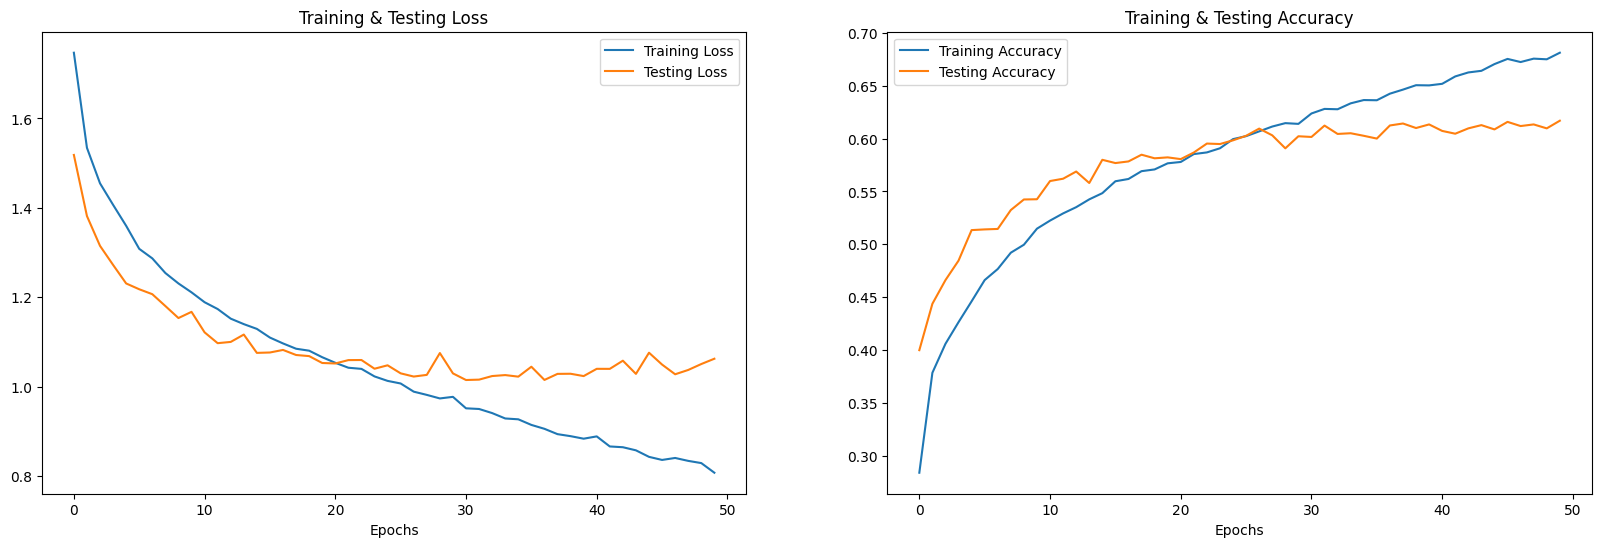

In [63]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [64]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0          neutral       disgust
1            happy         happy
2         surprise      surprise
3          disgust       disgust
4            angry         angry
5          neutral           sad
6         surprise      surprise
7         surprise      surprise
8          neutral       neutral
9          neutral       neutral

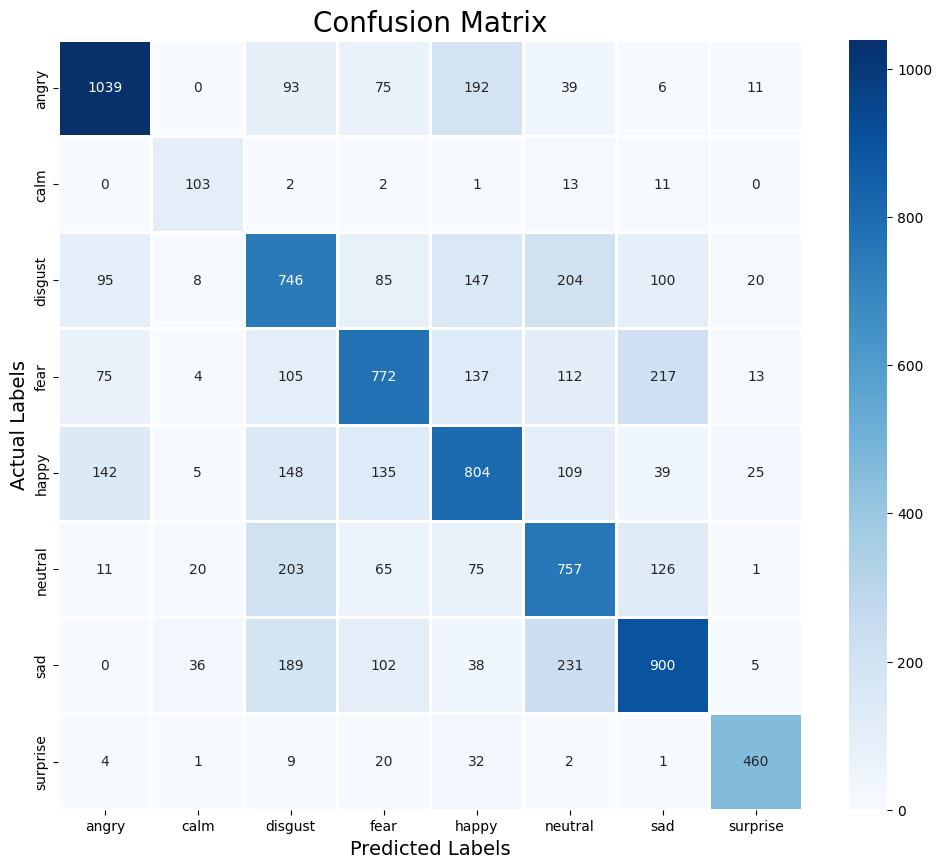

In [49]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.71      0.74      1455
        calm       0.58      0.78      0.67       132
     disgust       0.50      0.53      0.51      1405
        fear       0.61      0.54      0.57      1435
       happy       0.56      0.57      0.57      1407
     neutral       0.52      0.60      0.56      1258
         sad       0.64      0.60      0.62      1501
    surprise       0.86      0.87      0.86       529

    accuracy                           0.61      9122
   macro avg       0.63      0.65      0.64      9122
weighted avg       0.62      0.61      0.61      9122

